In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler



from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

In [2]:
scaler = StandardScaler()
data, target = load_wine(return_X_y=True, as_frame=True)
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

In [3]:
wdata = pd.DataFrame(data)
wdata = wdata.drop(index=[130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177])
wtarget = target.drop(np.where(target == 2)[0])

In [4]:
np.where(target == 2)[0]

array([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(wdata, wtarget, train_size=0.5)

In [6]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
rfc.feature_importances_

array([0.21463308, 0.01349943, 0.01161709, 0.04141952, 0.08702979,
       0.04896567, 0.09436729, 0.00600678, 0.01021519, 0.18334634,
       0.00508131, 0.02505478, 0.25876374])

<AxesSubplot:xlabel='importance', ylabel='name'>

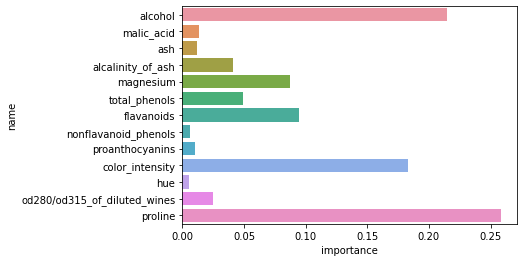

In [7]:
import seaborn as sns
features_imp3 = pd.DataFrame({'importance': rfc.feature_importances_,
'name':data.columns})
sns.barplot(x='importance', y='name', data=features_imp3)

In [8]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [9]:
rfr.feature_importances_

array([0.17773635, 0.00651675, 0.00220991, 0.01340043, 0.01372255,
       0.0029362 , 0.01181677, 0.        , 0.0021898 , 0.05659515,
       0.00667268, 0.00115865, 0.70504475])

In [10]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [11]:
import seaborn as sns
features_imp = pd.DataFrame({'importance': rfr.feature_importances_,
'name':data.columns})

<AxesSubplot:xlabel='importance', ylabel='name'>

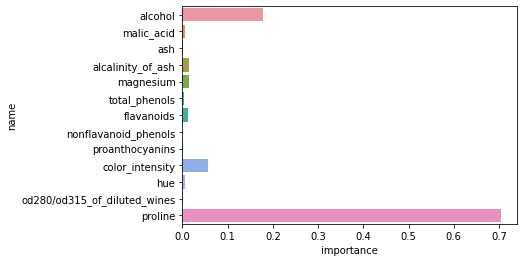

In [12]:
sns.barplot(x='importance', y='name', data=features_imp)

__________________________________________________________________________

Деревьям плевать на scaler)

А еще мне нужно было использовать классифайер вместо регрессии)

__________________________________________________________________________

2

In [2]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)

In [3]:
data = pd.read_csv('tree_bagging.csv')

In [4]:
X, y = data.iloc[:, :100], data.iloc[:, 100]

In [5]:
x_train, y_train = X[:6000], y[:6000]
x_test, y_test = X[6000:], y[6000:]

In [9]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

Просто без класса через дерево все работает

In [125]:
class Bagging():
  def __init__(self,  x_test, n_estimators=10):
    self.n_estimators = n_estimators
    self.regressors = np.zeros(x_test.shape[0])
    self.dtr = DecisionTreeRegressor(random_state=0)
  def fit_predict(self, x_train, y_train, x_test):
    for i in range(self.n_estimators):
        np.random.seed(i)
        index = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
        self.dtr.fit(x_train[index], y_train[index])
        self.regressors += self.dtr.predict(x_test)
        
        
  def predict(self, x_test):
    return self.regressors / self.n_estimators #оставить только ретерн, а предсказание перенсти в фит


In [ ]:
x_train['0.510631563822552'] #ссылатся на колонки

In [159]:
sosok =  Bagging(x_test, n_estimators=100)

In [160]:
sosok.fit_predict(x_train, y_train, x_test)

In [161]:
mean_squared_error(y_test, sosok.predict(x_test))/1000

10.974000900141267

На бустинге получилось: 1д - 32, 10д - 13, 100д - 11

In [144]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

In [145]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [146]:
mean_squared_error(y_test, rfr.predict(x_test))/1000

11.02887360356163

На лесе получилось: 1д - 35о, 5д - 15о, 100д - 11о

In [147]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0, bootstrap=True, oob_score=True)
rfr.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [154]:
rfr.oob_score_

0.7522793448061679

out-of-bag ошибка